In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')

# 读取数据

In [2]:
dataset = [25, 35]
a = 0.02 # 浓度
l0 = {
    dataset[0]: 2.260,
    dataset[1]: 2.593
}
linf = {
    dataset[0]: 0.884,
    dataset[1]: 1.055
}

In [3]:
datapath = os.path.join('..', '数据', '皂化反应')
data = {}
for t in dataset:
    data[t] = pd.read_csv(os.path.join(datapath, '%d.csv' % t), index_col=0)
data[25].head()

,L
t,
2,2.002
4,1.893
6,1.801
8,1.722
10,1.655


# 直线化方程

$$
akt = \frac{L_0 - L_t}{L_t - L_{\infty}}
$$

In [4]:
Y = {}
for t in dataset:
    Y[t] = (l0[t] - data[t]['L']) / (data[t]['L'] - linf[t])

## 最小二乘拟合

In [5]:
from scipy.optimize import curve_fit

popt = {}
slope = {}
for t in dataset:
    popt[t], _ = curve_fit(lambda x, a, b: a * x + b, data[t].index, Y[t])
    slope[t] = popt[t][0]
popt

{25: array([ 0.08084964, -0.00175881]), 35: array([0.08712072, 0.23861218])}

In [6]:
x_pred = np.linspace(0, data[25].index[-1], 100)

## 绘制图像

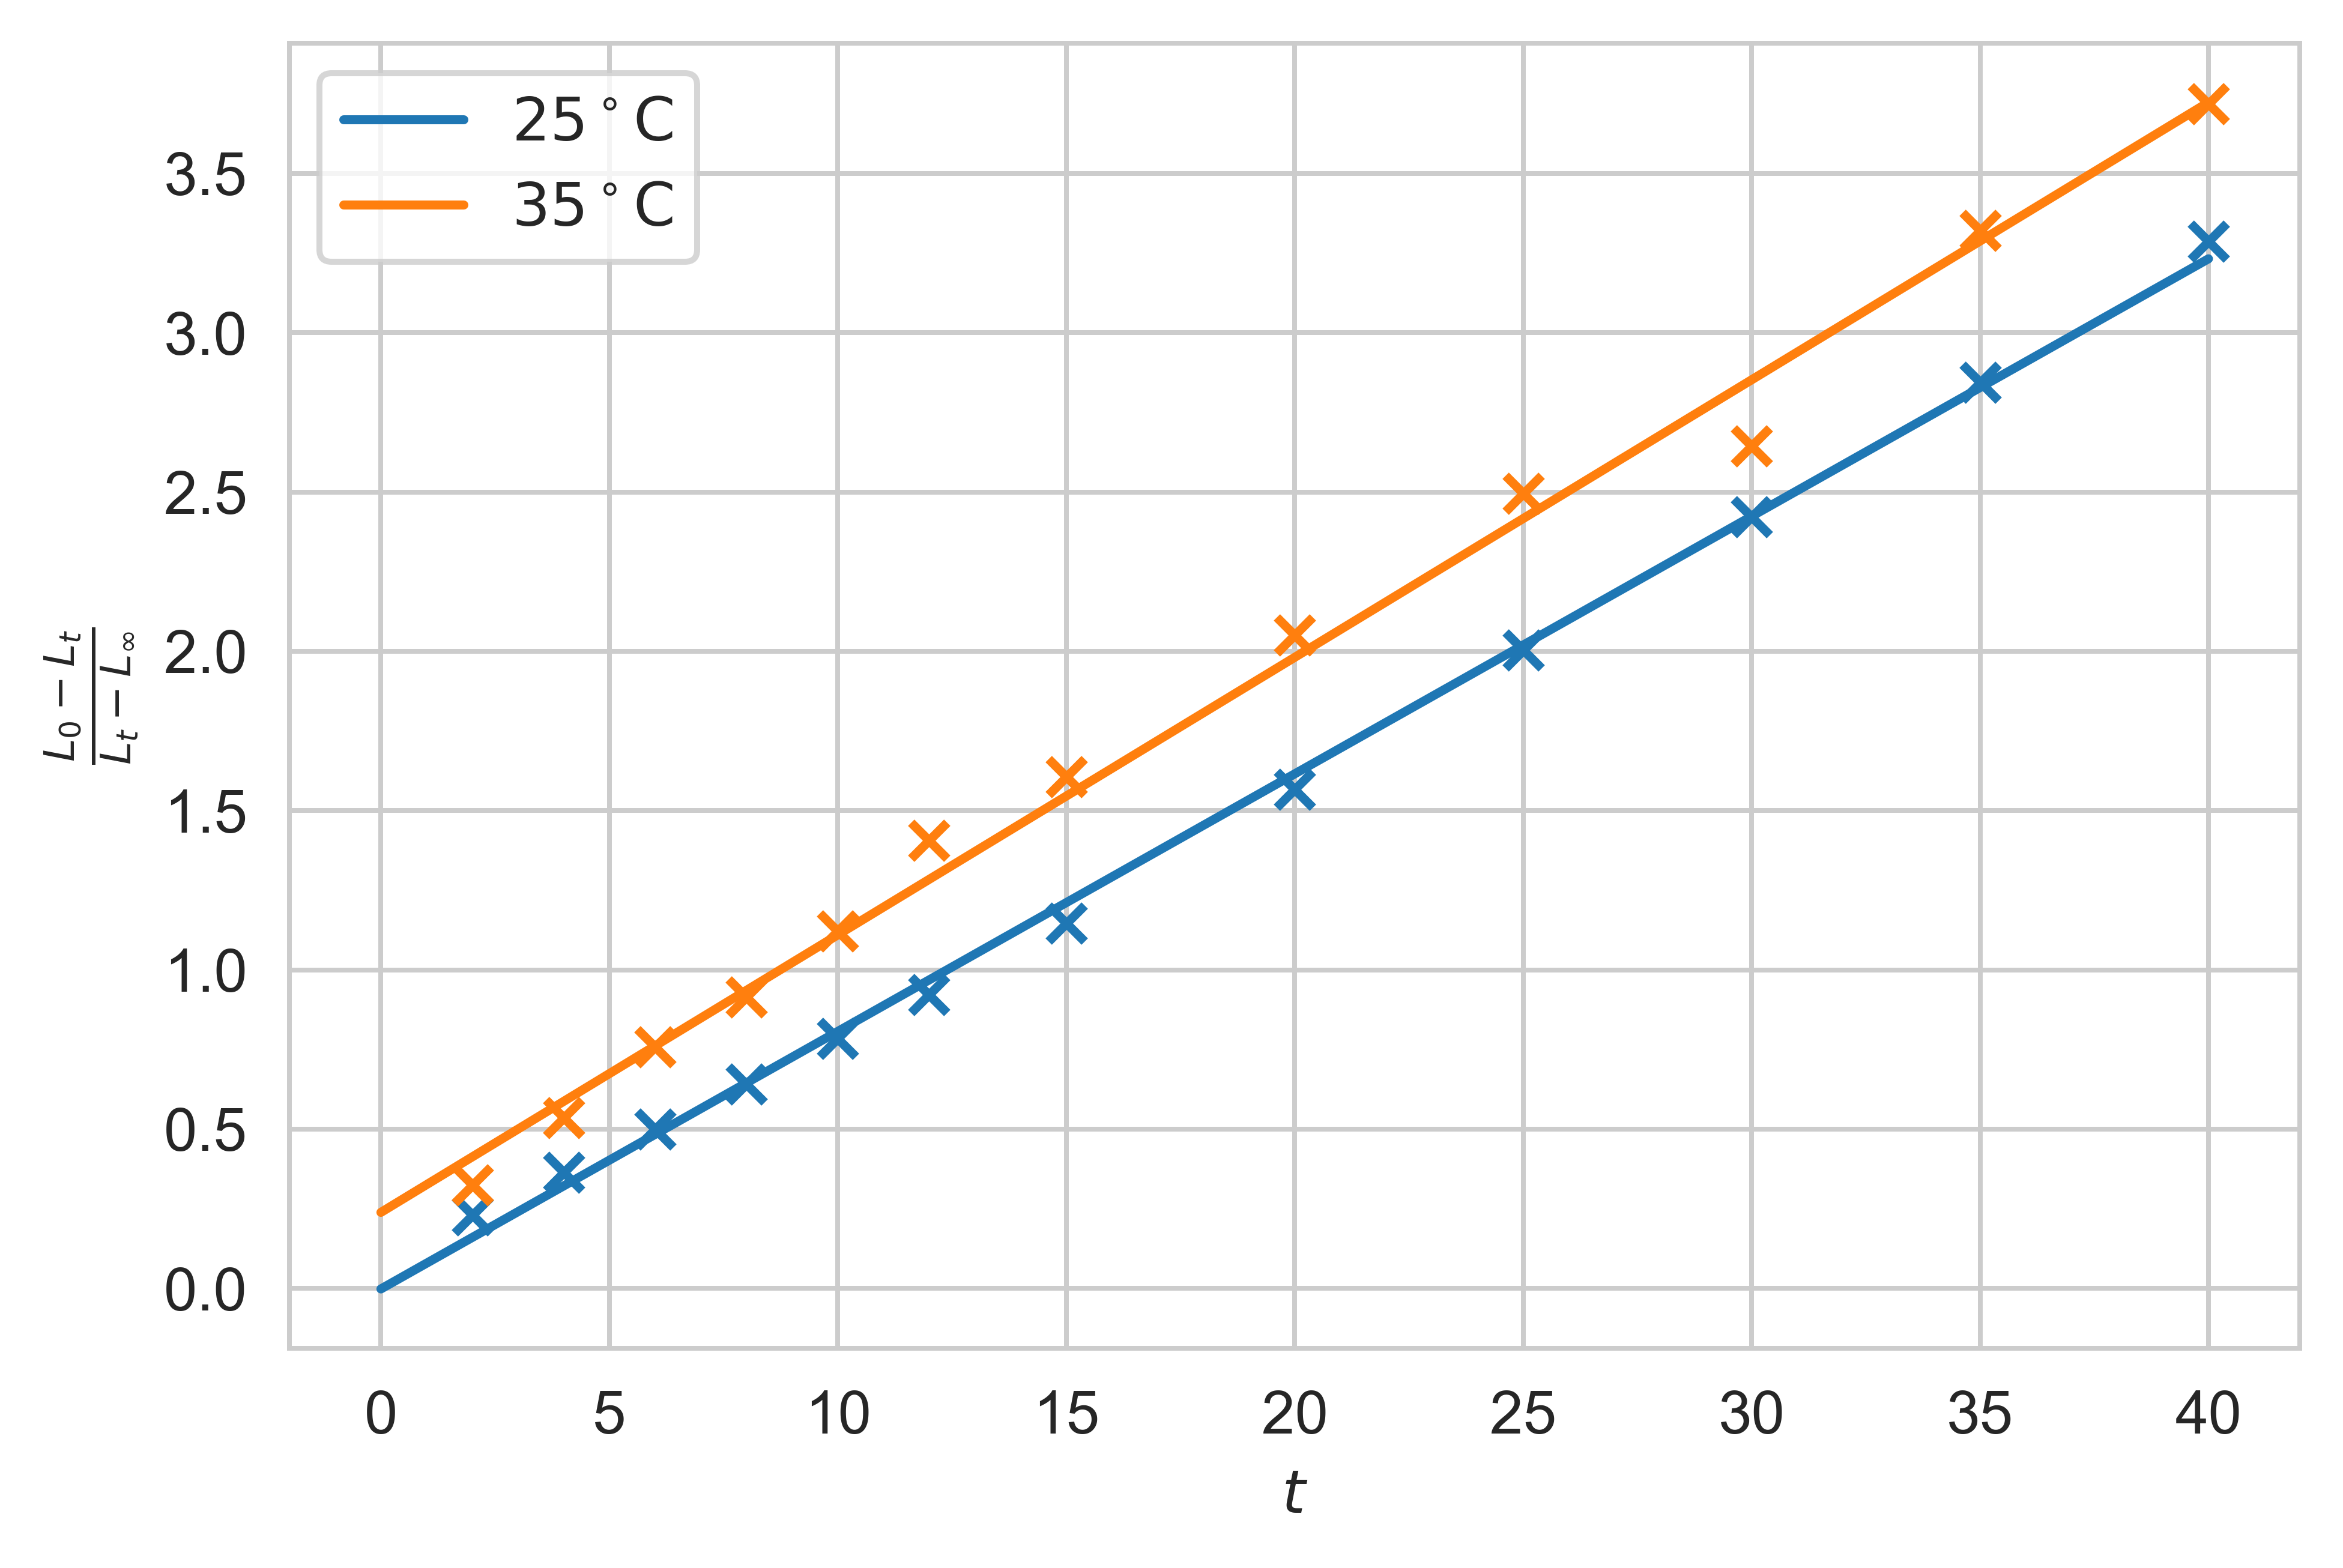

In [7]:
fig, ax = plt.subplots(dpi=720)
for t in dataset:
    ax.scatter(data[t].index, Y[t], marker='x')
    ax.plot(x_pred, popt[t][0] * x_pred + popt[t][1], label=r'$%d^\circ \mathrm{C}$' % t)
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$\frac{L_0 - L_t}{L_t - L_{\infty}}$')
ax.legend()

In [8]:
k = {}
for t in dataset:
    k[t] = slope[t] / a
k

{25: 4.042482247473739, 35: 4.356035843573379}

# 半衰期


In [9]:
t = 1 / ((slope[25] + slope[35]) / 2)
t

11.906862486442787

# 活化能

$$
\ln \frac{k_1}{k_2} = -\frac{E_a}{R} \left( \frac{1}{T_2} - \frac{1}{T_1} \right)
$$

In [10]:
from scipy.constants import R
Ea = np.log(k[25] / k[35]) * R / (1 / 35 - 1 / 25)
Ea

54.34796175904726